In [1]:
''' PRE-PROCESSING (INDIVIDUAL 1) '''
''' Michelangelo Rubino '''

# The function preproc_df(filename) at the end of this stage can be used to perform the following transformations:

# Step 1 - delete the features with no values
# Step 2 - delete the features with duplicated values 
# Step 3 - remove highly correlated features (kendall/spearman >= 0.9)
# Step 4 - standardize the features to give them a distribution closer to the normal one

import csv
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

# uncomment to show every output rows
#pd.set_option('display.max_rows', 200) 

# uncomment to show every output columns
#pd.set_option('display.max_columns', 200) 

set_printoptions(precision=3) # how the floating numbers are shown

''' Load the data from the train dataset and create a dataframe '''

filename = 'train_imperson_without4n7_balanced_data.csv'

# use the code below to load the test dataset
# filename = 'test_imperson_without4n7_balanced_data.csv'

df = pd.read_csv(filename,
                header=0,
                na_values=['nan'])


In [7]:
''' View dataframe info '''

# the dataframe does not contain null values (it can be verified by using df.isnull().sum())
# 97,044 rows, 153 columns
# the class is the feature 155
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB
None


In [19]:
''' The observations are perfectly balanced: 50% class 0, 50% class 1 '''
class_counts = df.groupby('155').size()
print(class_counts)

155
0    48522
1    48522
dtype: int64


In [15]:
''' Check the first 10 rows '''
df.head(10)

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
5,0,0,0,0.005099,0.005099,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
6,0,0,0,0.020133,0.020133,0.073203,0.073203,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
7,0,0,0,0.140800,0.140800,0.144440,0.144440,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
8,0,0,0,0.004916,0.004916,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
9,0,0,0,0.034137,0.034137,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0


In [9]:
''' Descriptive statistics '''
print(df.describe())

             1        2        3             5             6             8  \
count  97044.0  97044.0  97044.0  97044.000000  97044.000000  97044.000000   
mean       0.0      0.0      0.0      0.006252      0.006252      0.193837   
std        0.0      0.0      0.0      0.015541      0.015541      0.354444   
min        0.0      0.0      0.0      0.000003      0.000003      0.000000   
25%        0.0      0.0      0.0      0.001442      0.001442      0.037908   
50%        0.0      0.0      0.0      0.003706      0.003706      0.037908   
75%        0.0      0.0      0.0      0.005916      0.005916      0.054902   
max        0.0      0.0      0.0      0.978440      0.978440      1.000000   

                  9       10       11       12       13            14  \
count  97044.000000  97044.0  97044.0  97044.0  97044.0  97044.000000   
mean       0.193837      0.0      0.0      0.0      0.0      0.999784   
std        0.354444      0.0      0.0      0.0      0.0      0.014709   
min  

In [2]:
''' Step 1 - Delete columns with no values '''

columnsToDelete = [] 

# if the feature has std == 0 it means no values or only one value
for key, value in df.iteritems():
    if df[key].std() == 0:
        columnsToDelete.append(key)
        
df1 = df.drop(columnsToDelete, axis=1) # 74 features have been deleted

# the features are now 78 + 1 class
print(df1.columns.values)


['5' '6' '8' '9' '14' '15' '16' '18' '20' '26' '29' '38' '43' '47' '48'
 '50' '51' '52' '61' '62' '64' '66' '67' '68' '70' '71' '72' '73' '75'
 '76' '77' '78' '79' '80' '82' '83' '84' '86' '88' '89' '90' '93' '94'
 '97' '98' '104' '105' '106' '107' '108' '109' '110' '111' '112' '113'
 '117' '118' '119' '120' '121' '122' '123' '125' '126' '127' '128' '129'
 '130' '133' '138' '140' '141' '142' '143' '144' '145' '146' '154' '155']


In [3]:
''' Step 2 - Some features are duplicates of other features, then they can be removed keeping only the first column '''

# df has 14 duplicated features, then, after removing them, the new dataframe has 64 features + 1 class
df2 = df1.loc[:,~df1.T.duplicated(keep='first')]

# the features are now 64 + 1 class
print(df2.columns.values)


['5' '8' '14' '38' '47' '48' '50' '51' '61' '64' '66' '67' '68' '70' '71'
 '72' '73' '75' '76' '77' '78' '79' '80' '82' '83' '84' '86' '88' '90'
 '93' '94' '97' '98' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '117' '118' '119' '120' '121' '122' '123' '125' '126' '127' '128'
 '129' '130' '138' '140' '141' '142' '143' '144' '145' '154' '155']


In [4]:
''' Check the unique values for each feature '''

print(df2.nunique()) 


5       8718
8        399
14         2
38     25023
47        12
       ...  
143     1076
144       75
145        3
154      333
155        2
Length: 65, dtype: int64


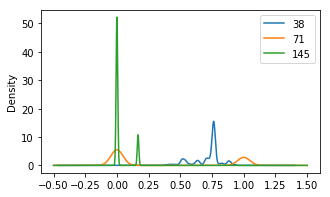

In [12]:
'''Plot the distribution for the 3 main groups:

    - features with continuous values between 0 and 1 (ex: 38)
    - features with only two values, 0 and 1 (ex: 71)
    - features with a few values (ex: 145) '''

# no feature with a perfect normal distribution
df2[["38", "71", "145"]].plot.kde(figsize=(5,3), sharex=False)
pyplot.show()


In [6]:
''' Step 3 - Create two correlation matrices (Kendall and Spearman) and remove highly correlated features (ie. >= 0.9 )'''

# Create correlation matrix with kendall method
corr_matrix_kendall = df2.corr(method='kendall').abs()

# Create a True/False mask and apply it
mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)

# List column names of highly correlated features ( >= 0.90 )
kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

# Create correlation matrix with spearman method
corr_matrix_spearman = df2.corr(method='spearman').abs()

# Create a True/False mask and apply it
mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)

# List column names of highly correlated features ( >= 0.90 )
spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]

# The two methods show almost the same features, 19 are in common, 1 is not
drop_high_corr = []
for i in kendall_to_drop:
    if i in spearman_to_drop:
        drop_high_corr.append(i)

# drop the 19 common features with high correlation both with kendall and spearman       
df3 = df2.drop(drop_high_corr, axis=1)  

# print the common features removed from the dataframe
print(drop_high_corr)


['47', '50', '64', '66', '68', '84', '86', '90', '97', '98', '107', '108', '118', '119', '126', '127', '128', '129', '141']


In [7]:
''' After this step the dataframe has 45 features and 1 class '''

print(len(df3.columns.values))
print(df3.columns.values)

46
['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'
 '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'
 '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'
 '142' '143' '144' '145' '154' '155']


In [ ]:
''' Analysis and plotting of the dataframe df3 show that none of the features has a normal form '''

# Uncomment to see the plots

# skewness
#skew = df3.skew()
#print(skew)

# histogram plot
#df3.hist(layout=(9,9), figsize=(30,14))
#pyplot.show()

# density plot
#df3.plot(kind='density', subplots=True, layout=(9,9), sharex=False, figsize=(20,14))
#pyplot.show()

# Box and Whisker Plot
#df3.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,14))
#pyplot.show()

# Scatterplot Matrix
# it takes a lot to run
#scatter_matrix(df3, figsize=[5, 5])
#pyplot.show()


In [8]:
''' Step 4 - Standardize the features to give them a normal form: mean = 0, sd = 1 '''

# save the features name
features_names = df3.columns.values

# use the array lenght
df3_len = len(df3.columns.values) - 1

# extract the values from the dataframe
array = df3.values
X = array[:, 0:df3_len] # extract the features
Y = array[:, df3_len].astype(int) # extract the class

# fit and transform the values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# a new dataframe is created with the standardized values
df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

# add the class 155
df4.insert(df3_len, '155', Y, False)


In [9]:
''' Now we have a dataframe with standardized values '''

print(df4.head(5))


          5         8        14        38       48        51        61  \
0 -0.398089 -0.521063  0.014712 -3.142811  0.01475  1.534041  0.708991   
1 -0.401396 -0.546879  0.014712 -3.142628  0.01475  1.534041  0.708991   
2  1.883791 -0.347726  0.014712 -3.142264  0.01475 -0.651873 -0.254672   
3 -0.072373 -0.279498  0.014712 -3.141809  0.01475 -0.651873 -4.109153   
4  1.857280 -0.347726  0.014712 -3.141445  0.01475 -0.651873 -0.013756   

         67        70        71  ...       125       130      138       140  \
0 -0.175252 -0.285459  1.391247  ... -0.038843 -0.148360 -0.00321 -1.050047   
1  1.575793 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   
2  0.602982 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   
3  0.602982 -0.285459 -0.718780  ... -0.038843  6.740366 -0.00321 -1.050047   
4  0.602982 -0.285459 -0.718780  ... -0.038843 -0.148360 -0.00321 -1.050047   

        142       143      144       145       154  155  
0 -0.995985 -0.091603 

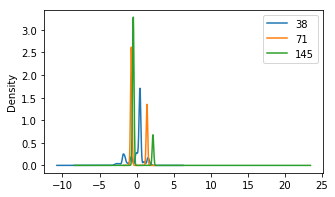

In [11]:
''' After standardizing, the features do not show a perfect bell-shaped distribution, but there
    is some improvement '''

df4[["38", "71", "145"]].plot.kde(figsize=(5,3), sharex=False )
pyplot.show()


In [ ]:
''' This function performs the steps previously described '''

filename = 'train_imperson_without4n7_balanced_data.csv'

def preproc_df(filename):
    dataframe = pd.read_csv(filename, header=0, na_values=['nan'])
    
    # Step 1 - remove features with no values
    columnsToDelete = [] 
    for key, value in dataframe.iteritems():
        if dataframe[key].std() == 0:
            columnsToDelete.append(key)
        
    df1 = dataframe.drop(columnsToDelete, axis=1)
    
    # Step 2 - remove duplicated features, keeping only the first one 
    df2 = df1.loc[:,~df1.T.duplicated(keep='first')]
    
    # Step 3 - Compute correlation matrices and drop the features with high correlation 
    corr_matrix_kendall = df2.corr(method='kendall').abs()
    mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
    tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)
    kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

    corr_matrix_spearman = df2.corr(method='spearman').abs()
    mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
    tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)
    spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]
    
    # list the features having high kendall and spearman correlation
    drop_high_corr = []
    for i in kendall_to_drop:
        if i in spearman_to_drop:
            drop_high_corr.append(i)

    # drop the common features       
    df3 = df2.drop(drop_high_corr, axis=1)  
    
    # Step 4 - Standardize the features
    features_names = df3.columns.values # save the feature names
    df3_len = len(df3.columns.values) - 1 # use the array length 

    # extract the values from the dataframe (features and class)
    array = df3.values
    X = array[:, 0:df3_len] 
    Y = array[:, df3_len].astype(int) 

    # fit and transform the values
    scaler = StandardScaler().fit(X)
    rescaledX = scaler.transform(X)

    # a new dataframe is created with the standardized values
    df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

    # add the class 155
    df4.insert(df3_len, '155', Y, False)

    return df4


In [ ]:
''' Before the Feature selection stage the train dataset has 45 features and 1 class

['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'
 '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'
 '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'
 '142' '143' '144' '145' '154' '155']


while the test dataset has 43 features and 1 class

['5' '8' '14' '38' '47' '48' '51' '61' '64' '67' '70' '71' '72' '73' '75'
 '76' '77' '79' '80' '81' '82' '94' '104' '105' '106' '109' '110' '111'
 '112' '120' '121' '122' '123' '125' '128' '140' '141' '142' '143' '144'
 '145' '148' '154' '155']
 
'''
